<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
ام نیست
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    با پیشرفت در طراحی سیستم‌های سخت‌افزاری، امکان اجرای الگوریتم‌های پیشرفته و سنگین‌تر فراهم شد. در نتیجه این اتفاق، رخدادهای فراوانی به وقوع پیوست که یکی از آن‌ها تحول در پردازش تصویر رقمی بود.
    <br>
    منظور از پردازش تصویر رقمی، آنالیز و کشف الگو در دل تصاویر دیجیتال است. کاربردهای پردازش تصویر را در <i>face recognition</i> تلفن‌های همراه هوشمند می‌توان مشاهده کرد. این سیستم‌ها با دریافت تصویر به عنوان ورودی، تشخیص می‌دهد که آیا شخص مجاز به ورود به تلفن همراه هست یا خیر. البته عملکرد این سیستم فراتر از یک تشخیص ساده است. زیرا ممکن است شخصی با گرفتن عکس شما جلو دوربین تلفن همراه، قصد ورود غیرمجاز به حریم شخصی شما را داشته باش!
    <br>
    از بحث تشخیص چهره بگذریم، یکی از ساده‌ترین مثال‌هایی که در پردازش تصویر مطرح است، تشخیص ارقام دست‌نویس است. به این معنی که با دریافت عکس از یک عدد دست‌نویس، کامپیوتر بتواند تشخیص دهد چه عددی ورودی گرفته است.
    <br>
    مثلا با مشاهده این عکس عدد چهار را خروجی دهد.
    <br>
    <img src="./four.png", alt="picture of four"/>

</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
داده آموزشی مسئله دارای ۶۰۰۰۰ سطر و ۷۸۵ ستون است.
    <br>
   هر سطر اطلاعات یک عکس را نشان می‌دهد. اولین ستون نشان‌دهنده برچسب نمونه (عددی داخل عکس) و ۷۸۴ ستونی که در ادامه آمده‌اند، ویژگی‌های یک عکس هستند.
    <br>
       عکس را می‌توان یک ماتریس در نظر گرفت که هر درایه آن یک پیکسل است. عدد موجود در هر درایه بین ۰ و ۲۵۵ است و هر چه به ۲۵۵ نزدیک شود، درجه روشنایی آن پیکسل بیشتر خواهد بود. بنابراین پیکسلی با عدد ۲۵۵ کامل سفید و پیکسلی با عدد ۰ کامل سیاه نمایش داده خواهد شد. مثلا در عکس بالا، پیکسل‌هایی که درون عدد ۴ هستند، عدد بزرگتری نسبت به حاشیه تصویر که سیاه رنگ است، دارند.
    <br>
    دیتاست این تمرین نیز در حقیقت شامل ۶۰ هزار ماتریس ۲۸*۲۸ است. برای راحتی شما هر کدام از ماتریس‌های ۲۸*۲۸ را هموار کرده‌ایم. به این معنی که سطرهای ماتریس را در امتداد همدیگر چیده و یک آرایه ۷۸۴تایی درست کرده‌ایم.
    <br>
    برای همین است که هر سطر دیتافریم (هر عکس) دارای ۷۸۴ ستون یا ویژگی است و یک برچسب هم دارد.
    <br>
    نامگذاری ستون‌های دیتافریم به صورت $i*j$ است. یعنی عددی که در این ستون مشاهده می‌کنید در ماتریس اصلی (قبل از هموار شدن) در سطر $i$ ام و ستون $j$ ام قرار داشته.
    <br>
    ستون دیگری به اسم <code>label</code> فقط در دیتافریم آموزش یافت می‌شود که نشانگر عدد درون تصویر است.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از دادگان آموزشی را به عنوان دادگان اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [4]:
train_data = pd.read_csv('../data/mnist_train.csv')
test_data = pd.read_csv('../data/mnist_test.csv')


train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که در فصل‌های گذشته آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    تلاش کنید با <code>reshape</code> کردن یک سطر از دیتافریم، و با استفاده از مت‌پلات‌لیب عدد درون آن را مشاهده کنید.
    <br>
    متد <code>matshow</code> در مت‌پلات‌لیب برای به تصویر کشیدن ماتریس‌ها استفاده می‌شود.
</font>
</p>

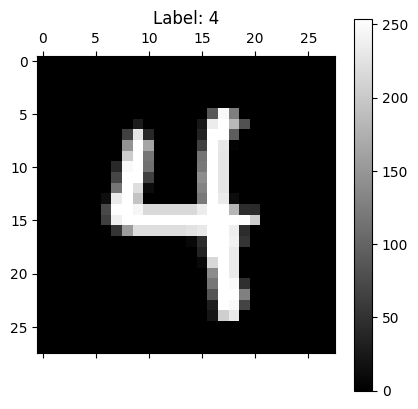

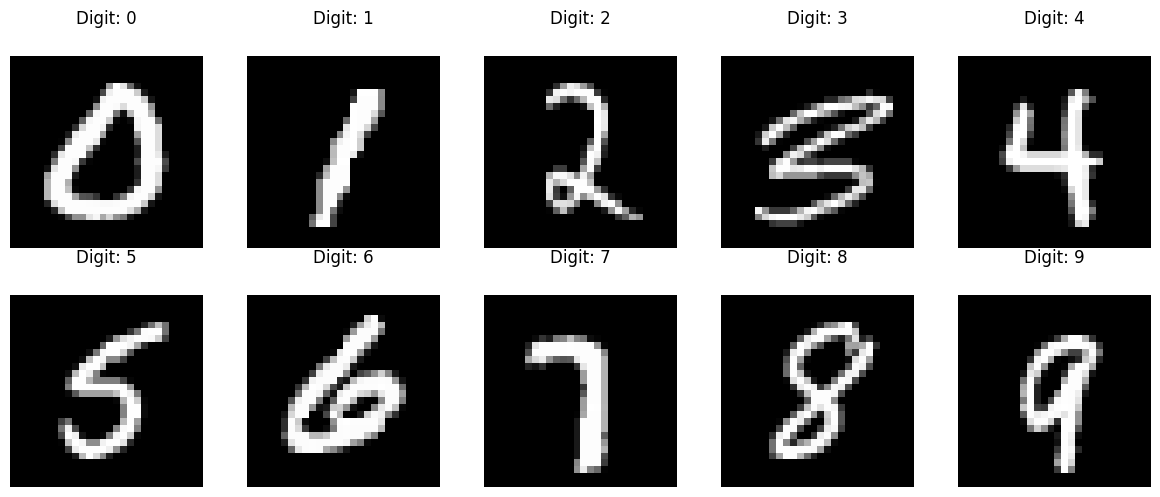

In [5]:

sample_row = train_data.iloc[0]
label = sample_row['label']
pixels = sample_row.drop('label').values.reshape(28, 28)

plt.matshow(pixels, cmap='gray')
plt.title(f'Label: {label}')
plt.colorbar()
plt.show()

# Show a few samples from each class
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for digit in range(10):
    row = train_data[train_data['label'] == digit].iloc[0]
    pixels = row.drop('label').values.reshape(28, 28)
    ax = axes[digit // 5][digit % 5]
    ax.matshow(pixels, cmap='gray')
    ax.set_title(f'Digit: {digit}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
X = train_data.drop(columns=['label']).values
y = train_data['label'].values
X_test = test_data.values

X = X / 255.0
X_test = X_test / 255.0

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    حال که داده را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
</font>
</p>

<h3 align=right style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
    استفاده از <code>scikit-learn</code>
</font>
</h3>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    الگوریتم <i>پرسپترون چند لایه</i> با نام <code>MLPClassifier</code> در پکیج <code>neural_network</code> این کتابخانه در دسترس است. برخی از آرگومان‌های مهم آن در جدول زیر آمده است، اما جهت مطالعه‌ی کامل‌تر مستندات می‌توانید به <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html" target="_blank">این لینک</a> مراجعه فرمایید.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    
|آرگومان|جنس و تایپ|توضیحات|
|:------:|:--------:|:---:|
|hidden_layer_sizes|<code>tuple</code>|تعداد نورون‌های لایه‌های مخفی شبکه عصبی را نشان می‌دهد. <code>len</code> این آرگومان برابر است با $n_{layers} -2 $. المان $i$ ام این تاپل، تعداد نورون‌های لایه $i$ ام شبکه را نشان می‌دهد. به عنوان مثال $hidde\_layer\_sizes = (100,128)$ به معنی این است که در اولین لایه مخفی ۱۰۰ نورون و در دومین لایه مخفی ۱۲۸ نورون وجود داشته باشد. به صورت پیشفرض این آرگومان برابر است با $hidden\_layer\_sizes = (100, )$ |
|activation|<code>str</code>|تابع فعالسازی را با این آرگومان مشخص می‌کنیم. این آرگومان یکی از مقادیر *identity* , *relu*, *tanh*, *logistic* را می‌تواند بپذیرد. |
|solver|<code>str</code>|تابع بهینه‌ساز را مشخص می‌کند. این آرگومان به صورت پیشفرض بر روی *adam* تنظیم شده است، اما مقادیر دیگری نظیر *lbfgs* و *sgd* را نیز می‌پذیرد. بهینه‌ساز پیشفرض برای دیتاست‌هایی با هزاران یا بیشتر تعداد نمونه مناسب است؛ هم از لحاظ زمان آموزش و هم لحاظ معیار کیفی، نتایج قابل قبولی ارائه می‌کند. اما برای داده‌های کوچک‌تر می‌توانید از *lbfgs* استفاده کنید.|
|alpha|`float`|ضریب منظم‌سازی *L2* است که به تابع هزینه اضافه می‌شود.|
|tol|`float`|آستانه تحمل بهینه‌سازی را نشان می‌دهد. وقتی امتیاز یا هزینه مدل، در `n_iter_no_change` بار چرخش، به اندازه حداقل `tol` بهبود نمی‌یابد، مدل فرض می‌کند که تابع بهینه‌سازی، به نقطه اپتیمم همگرا شده است و الگوریتم را متوقف می‌کند.|
|max_iter|<code>int</code>|حداکثر دفعاتی که الگوریتم بهینه‌ساز مجاز است اجرا شود تا به نقطه بهینه همگرا شود. شرط پایان الگوریتم یا رسیدن به `max_iter` است یا اینکه با گذشت `n_iter_no_change` بار چرخش، امتیاز مدل دست کم `tol` هم بهبود پیدا نکند.|
|n_iter_no_change|<code>int</code>|حداکثر تعداد *epoch* ای که الگوریتم مجاز است اجرا شود تا به نقطه بهینه همگرا شود را نشان می‌دهد.|
|early_stopping|<code>bool</code>|مشخص می‌کند که آیا الگوریتم در صورتی که پس از `n_iter_no_change` بار چرخش، باز هم به نقطه بهینه همگرا نشده است، مجاز است متوقف شود یا خیر.|
    
</font>
</div>
</center>


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
آموزش مدل
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    در سلول زیر با استفاده از مدل آماده‌ای که در بالا شرح داده شد و به کمک تابع <code>fit</code> الگوریتم را بر روی دادگان آموزشی اجرا کنید.
</font>
</p>

In [7]:
model = MLPClassifier(
    hidden_layer_sizes=(256, 128),  
    activation='relu',        
    solver='adam',               
    alpha=1e-4,                
    batch_size=200,                
    learning_rate_init=0.001,     
    max_iter=50,                
    n_iter_no_change=10,         
    early_stopping=True,           
    validation_fraction=0.1,   
    tol=1e-4,                      
    random_state=42,
    verbose=True,            
)

print('Model defined!')
print('Training...')
model.fit(X_train, y_train)
print('\nTraining complete!')

Model defined!
Training...
Iteration 1, loss = 0.33200259
Validation score: 0.952407
Iteration 2, loss = 0.12666973
Validation score: 0.966296
Iteration 3, loss = 0.08491708
Validation score: 0.971667
Iteration 4, loss = 0.06149009
Validation score: 0.971296
Iteration 5, loss = 0.04615963
Validation score: 0.973704
Iteration 6, loss = 0.03430669
Validation score: 0.976667
Iteration 7, loss = 0.02600454
Validation score: 0.976667
Iteration 8, loss = 0.01989530
Validation score: 0.977963
Iteration 9, loss = 0.01692731
Validation score: 0.974259
Iteration 10, loss = 0.01246665
Validation score: 0.979259
Iteration 11, loss = 0.01074097
Validation score: 0.981111
Iteration 12, loss = 0.00815945
Validation score: 0.981481
Iteration 13, loss = 0.00643393
Validation score: 0.979444
Iteration 14, loss = 0.01101028
Validation score: 0.980000
Iteration 15, loss = 0.00943161
Validation score: 0.978148
Iteration 16, loss = 0.01064121
Validation score: 0.977407
Iteration 17, loss = 0.00892468
Valida

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>f1_score</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را بر روی دادگان آموزش یا اعتبارسنجی ارزیابی کنید.
</font>
</p>

In [8]:
y_pred_val = model.predict(X_val)

f1 = f1_score(y_val, y_pred_val, average='weighted')
print(f'Validation Weighted F1 Score: {f1:.4f} ({f1*100:.2f}%)')
print()
print(classification_report(y_val, y_pred_val))


Validation Weighted F1 Score: 0.9802 (98.02%)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       592
           1       0.99      0.99      0.99       675
           2       0.98      0.98      0.98       599
           3       0.96      0.99      0.98       612
           4       0.98      0.97      0.97       585
           5       0.98      0.97      0.98       541
           6       0.99      0.97      0.98       590
           7       0.98      0.99      0.98       625
           8       0.98      0.98      0.98       585
           9       0.98      0.96      0.97       596

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazirmatn" size=3>
 جهت کسب امتیاز کامل نیاز است تا پاسخ شما حداقل امتیاز <code>95%</code> را با توجه به معیار معرفی‌شده کسب نماید.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    پس از مهندسی ویژگی و مدلسازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای وابسته به متغیر هدف برساند.
    <br>
    از این مدل برای پیش‌بینی نمونه‌های موجود در داده تست استفاده کنید و نتایج را در قالب جدول (<code>dataframe</code>) زیر آماده کنید.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    
|ستون|توضیحات|
|------|---|
|label|عدد درون تصویر|
    
</font>
</div>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    اسم دیتافریم باید <i>submission</i> باشد؛ در غیر این صورت، سامانه داوری نمی‌تواند تلاش‌ شما را ارزیابی کند.
    <br>
    این دیتافریم تنها شامل ۱ ستون با اسم <i>label</i> است و ۱۰۰۰۰ سطر دارد.
    <br>
    به ازای هر سطر موجود در دیتافریم <i>test_data</i> شما باید یک مقدار پیشبینی شده داشته باشید.
    <br>
    جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته در جواب شما، اعداد ستون <i>label</i> ممکن است متفاوت باشد.
</font>
</p>

<div style="text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    
||label|
|----|-----|
|0|1|
|1|6|
|2|9|
|3|4|
|4|0|

</font>
</div>



In [10]:
final_model = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    batch_size=200,
    learning_rate_init=0.001,
    max_iter=model.n_iter_,    
    random_state=42,
    verbose=True,
)

final_model.fit(X, y)


train_f1 = f1_score(y, final_model.predict(X), average='weighted')

Iteration 1, loss = 0.29895543
Iteration 2, loss = 0.11290305
Iteration 3, loss = 0.07456213
Iteration 4, loss = 0.05457615
Iteration 5, loss = 0.04024192
Iteration 6, loss = 0.03089082
Iteration 7, loss = 0.02478868
Iteration 8, loss = 0.01757555
Iteration 9, loss = 0.01280590
Iteration 10, loss = 0.01289954
Iteration 11, loss = 0.01339948
Iteration 12, loss = 0.01139901
Iteration 13, loss = 0.00843876
Iteration 14, loss = 0.00944311
Iteration 15, loss = 0.00995347
Iteration 16, loss = 0.00572804
Iteration 17, loss = 0.01056018
Iteration 18, loss = 0.00728497
Iteration 19, loss = 0.00510407
Iteration 20, loss = 0.00832615
Iteration 21, loss = 0.00782525
Iteration 22, loss = 0.00354900
Iteration 23, loss = 0.00618168


In [11]:
y_pred_test = final_model.predict(X_test)

submission = pd.DataFrame({'label': y_pred_test})
print(submission.head())

   label
0      9
1      5
2      0
3      8
4      8


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [12]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

joblib.dump(model, 'model')
submission.to_csv('submission.csv', index=False)
file_names = ['mnist.ipynb', 'submission.csv', 'model']
compress(file_names)

File Paths:
['mnist.ipynb', 'submission.csv', 'model']
